# Exploratory Data Analysis
---

In [85]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import os
import datetime as dt 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from chord import Chord
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 15
width = 0.75
from wordcloud import WordCloud
sns.set_palette(sns.color_palette('tab20', 20))
import plotly.graph_objs as go
from datetime import date, timedelta
from empath import Empath
lexicon = Empath()
from chord import Chord

data = pd.read_csv('/Users/qab/Desktop/Personal/NLP Projects/Context Maturity (NLP)/Data/jon_bellion.csv')

In [86]:
data.head()

,titles,album,date_released,lyrics,processed_lyrics
0,dead man wallking,translation_through_speakers,"February 20, 2013","you know, maybe i'm drunk, maybe i'm not mayb...","you know, maybe i'm drunk, maybe i'm not mayb..."
1,dont ask cuz i dont know,translation_through_speakers,"February 20, 2013","yeah, see, check the bounce out welcome to th...",", see, check the bounce out welcome to the do..."
2,for the dreamers,translation_through_speakers,"February 20, 2013","like some dope shit, ohh la da da da da da li...","like some dope shit, like mad people, ..."
3,life,translation_through_speakers,"February 20, 2013",22 and confused on what to do and how to set ...,22 and confused on what to do and how to set ...
4,paper planes,translation_through_speakers,"February 20, 2013","oh, that ass, it was so first class she was m...",", that ass, it was so first class she was my ..."


In [87]:
def extract_empath(lyrics):
    return lexicon.analyze(lyrics)

def make_tags(tags):
    tgs = [k for k, v in tags.items() if v != 0]
    return tgs

def process(st):
    st = str(st)
    table = str.maketrans(dict.fromkeys(string.punctuation))
    new_s = st.translate(table)
    return new_s

data['empath_themes'] = data['lyrics'].apply(extract_empath).apply(make_tags).apply(process).apply(lambda x: ''.join(x))

In [88]:
data.head()

,titles,album,date_released,lyrics,processed_lyrics,empath_themes
0,dead man wallking,translation_through_speakers,"February 20, 2013","you know, maybe i'm drunk, maybe i'm not mayb...","you know, maybe i'm drunk, maybe i'm not mayb...",help office dance wedding domesticwork sleep c...
1,dont ask cuz i dont know,translation_through_speakers,"February 20, 2013","yeah, see, check the bounce out welcome to th...",", see, check the bounce out welcome to the do...",office dance wedding domesticwork sleep family...
2,for the dreamers,translation_through_speakers,"February 20, 2013","like some dope shit, ohh la da da da da da li...","like some dope shit, like mad people, ...",help dance domesticwork sleep cold hate cheerf...
3,life,translation_through_speakers,"February 20, 2013",22 and confused on what to do and how to set ...,22 and confused on what to do and how to set ...,dance domesticwork vacation masculine sufferin...
4,paper planes,translation_through_speakers,"February 20, 2013","oh, that ass, it was so first class she was m...",", that ass, it was so first class she was my ...",hate family vacation horror swearingterms suff...


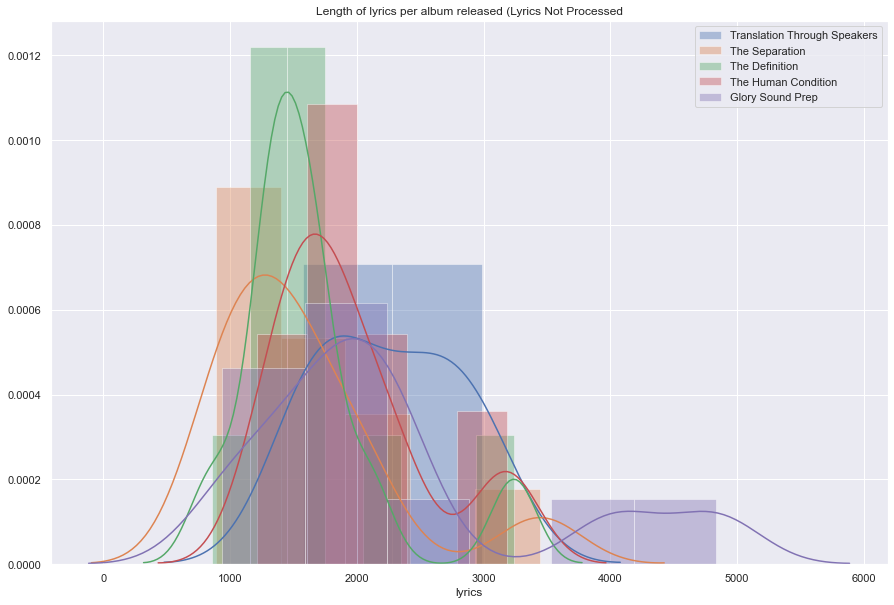

In [89]:
sns.set(rc = {'figure.figsize':(15, 10)})
album1 = data[data['album'] == 'translation_through_speakers']['lyrics'].str.len()
sns.distplot(album1, label = 'Translation Through Speakers')
album2 = data[data['album'] == 'the_separation']['lyrics'].str.len()
sns.distplot(album2, label = 'The Separation')
album3 = data[data['album'] == 'the_definition']['lyrics'].str.len()
sns.distplot(album3, label = 'The Definition')
album4 = data[data['album'] == 'the_human_condition']['lyrics'].str.len()
sns.distplot(album4, label = 'The Human Condition')
album5 = data[data['album'] == 'glory_sound_prep']['lyrics'].str.len()
sns.distplot(album5, label = 'Glory Sound Prep')
plt.title('Length of lyrics per album released (Lyrics Not Processed')
plt.legend();

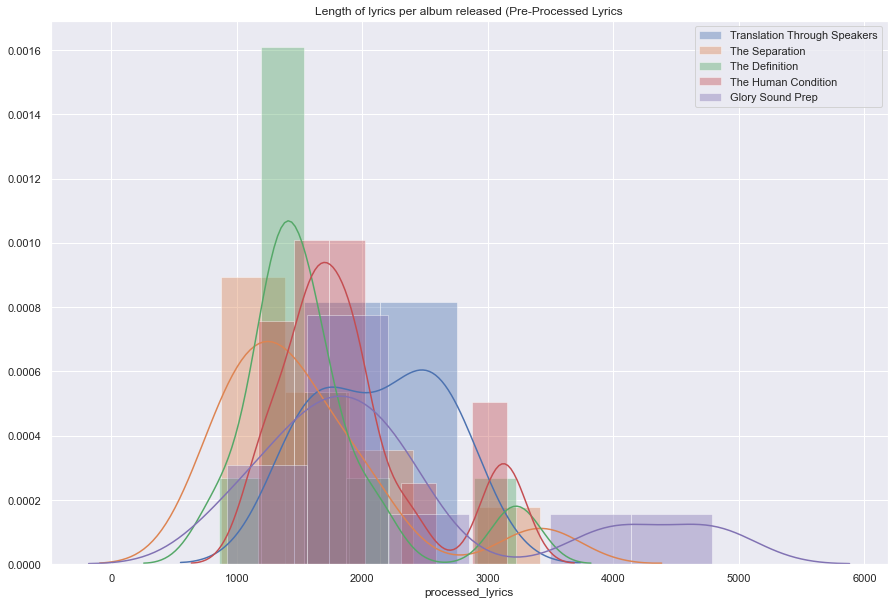

In [90]:
sns.set(rc = {'figure.figsize':(15, 10)})
album1 = data[data['album'] == 'translation_through_speakers']['processed_lyrics'].str.len()
sns.distplot(album1, label = 'Translation Through Speakers')
album2 = data[data['album'] == 'the_separation']['processed_lyrics'].str.len()
sns.distplot(album2, label = 'The Separation')
album3 = data[data['album'] == 'the_definition']['processed_lyrics'].str.len()
sns.distplot(album3, label = 'The Definition')
album4 = data[data['album'] == 'the_human_condition']['processed_lyrics'].str.len()
sns.distplot(album4, label = 'The Human Condition')
album5 = data[data['album'] == 'glory_sound_prep']['processed_lyrics'].str.len()
sns.distplot(album5, label = 'Glory Sound Prep')
plt.title('Length of lyrics per album released (Pre-Processed Lyrics')
plt.legend();